Quick Start


In [15]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root ='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14020331.50it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273786.78it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4972685.65it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14084981.73it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
datasets.FashionMNIST?

In [4]:
batch_size = 64

train_dataloader = DataLoader(training_data,batch_size=batch_size)
test_dataloader = DataLoader(test_data,batch_size=batch_size)

In [5]:
for X,y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [6]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device}')

Using cpu


In [7]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits


In [8]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

In [11]:
def train(dataloader, model, loss_fn,optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    # compute the predicition error
    pred = model(X)
    loss = loss_fn(pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [12]:
def test(dataloader,model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss,correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      X,y = X.to(device),y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /=num_batches
  correct /=size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [13]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)


Epoch 1
-------------------------------
loss: 2.310445  [   64/60000]
loss: 2.297322  [ 6464/60000]
loss: 2.280103  [12864/60000]
loss: 2.273204  [19264/60000]
loss: 2.248702  [25664/60000]
loss: 2.229151  [32064/60000]
loss: 2.239193  [38464/60000]
loss: 2.202797  [44864/60000]
loss: 2.204695  [51264/60000]
loss: 2.170147  [57664/60000]
Test Error: 
 Accuracy: 35.9%, Avg loss: 2.166867 

Epoch 2
-------------------------------
loss: 2.181961  [   64/60000]
loss: 2.172385  [ 6464/60000]
loss: 2.123283  [12864/60000]
loss: 2.135815  [19264/60000]
loss: 2.080340  [25664/60000]
loss: 2.033313  [32064/60000]
loss: 2.060545  [38464/60000]
loss: 1.984839  [44864/60000]
loss: 1.989696  [51264/60000]
loss: 1.920456  [57664/60000]
Test Error: 
 Accuracy: 52.6%, Avg loss: 1.918589 

Epoch 3
-------------------------------
loss: 1.952807  [   64/60000]
loss: 1.926611  [ 6464/60000]
loss: 1.822780  [12864/60000]
loss: 1.854426  [19264/60000]
loss: 1.738877  [25664/60000]
loss: 1.701579  [32064/600

Tensors

In [14]:
data = [[1,2],[4,5]]
x_data = torch.tensor(data)

In [16]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [19]:
x_ones = torch.ones_like(x_data)
print(f'Ones Tensor: \n {x_ones}')
x_rand = torch.rand_like(x_data,dtype=torch.float)
print(f'Random Tensor: \n {x_rand}\n')

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]])
Random Tensor: 
 tensor([[0.6505, 0.4683],
        [0.0730, 0.0672]])



In [20]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f'Random Tensor:\n {rand_tensor}\n')
print(f'Ones Tensor: \n {ones_tensor}\n')
print(f'Zeros Tensor: \n {zeros_tensor}\n')

Random Tensor:
 tensor([[0.6267, 0.2894, 0.5335],
        [0.7644, 0.2278, 0.6792]])

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])



In [21]:
tensor = torch.rand(3,4)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


In [22]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [27]:
tensor = torch.ones(4,4)
print(tensor[0])
print(tensor[:,0])
print(tensor[...,-1])
tensor[:,0]=0
print(tensor)

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([[0., 1., 1., 1.],
        [0., 1., 1., 1.],
        [0., 1., 1., 1.],
        [0., 1., 1., 1.]])


In [28]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)
print(t1)

tensor([[0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.]])


In [33]:
t2 = torch.stack([tensor,tensor])
t2.shape

torch.Size([2, 4, 4])

In [35]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor,tensor.T,out=y3)

z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor,tensor,out = z3)

tensor([[0., 1., 1., 1.],
        [0., 1., 1., 1.],
        [0., 1., 1., 1.],
        [0., 1., 1., 1.]])

In [36]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item,type(agg_item))

12.0 <class 'float'>


In [37]:
tensor.add_(5)
print(tensor)

tensor([[5., 6., 6., 6.],
        [5., 6., 6., 6.],
        [5., 6., 6., 6.],
        [5., 6., 6., 6.]])


In [38]:
t = torch.ones(5)
n = t.numpy()

In [39]:
t.add_(1)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [40]:
n = np.ones(5)-
t = torch.from_numpy(n)

In [41]:
np.add(n,1,out=n)
print(n)
print(t)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Datasets & DataLoaders

In [43]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [44]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)
testing_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

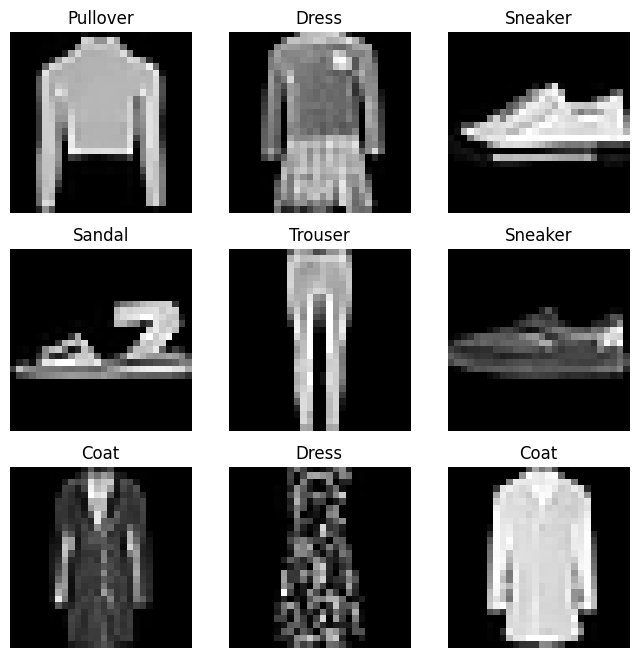

In [45]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()


In [46]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)
  def __getitem__(self,idx):
    img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
    image = read_image(img_path)
    label = img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


In [48]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


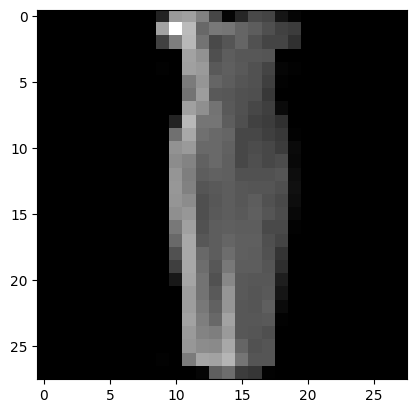

3


In [49]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap='gray')
plt.show()
print(f'{label}')

Transforms

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

100%|██████████| 26421880/26421880 [00:03<00:00, 7456437.34it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 134651.28it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2522647.57it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15259559.71it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cpu device


In [5]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [6]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
X = torch.rand(1,28,28,device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([5])


In [8]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [9]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [10]:
layer1 = nn.Linear(in_features=28*28,out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [11]:
print(hidden1)

tensor([[-0.8014, -0.0635, -0.0486,  0.0067,  0.6216,  0.1189,  0.2353,  0.0420,
          0.1732,  0.2119,  0.0027,  0.1832, -0.3144, -0.6887, -0.0875,  0.4730,
         -0.0761,  0.1796,  0.3436, -0.3556],
        [-0.8498, -0.2219,  0.2322,  0.1914,  0.5174,  0.0328, -0.1329,  0.3506,
          0.4073, -0.3794,  0.3304,  0.2859, -0.0905, -0.9518, -0.2369,  0.3843,
         -0.1054, -0.0611,  0.0130,  0.0094],
        [-0.8461, -0.4592,  0.1492,  0.0483,  0.3905, -0.3087, -0.0295,  0.1088,
          0.2246, -0.2462,  0.2039, -0.0304, -0.1603, -1.0486, -0.1913,  0.1657,
         -0.3834, -0.1056,  0.0224, -0.3448]], grad_fn=<AddmmBackward0>)


In [12]:
hidden1 = nn.ReLU()(hidden1)

In [13]:
print(hidden1)

tensor([[0.0000, 0.0000, 0.0000, 0.0067, 0.6216, 0.1189, 0.2353, 0.0420, 0.1732,
         0.2119, 0.0027, 0.1832, 0.0000, 0.0000, 0.0000, 0.4730, 0.0000, 0.1796,
         0.3436, 0.0000],
        [0.0000, 0.0000, 0.2322, 0.1914, 0.5174, 0.0328, 0.0000, 0.3506, 0.4073,
         0.0000, 0.3304, 0.2859, 0.0000, 0.0000, 0.0000, 0.3843, 0.0000, 0.0000,
         0.0130, 0.0094],
        [0.0000, 0.0000, 0.1492, 0.0483, 0.3905, 0.0000, 0.0000, 0.1088, 0.2246,
         0.0000, 0.2039, 0.0000, 0.0000, 0.0000, 0.0000, 0.1657, 0.0000, 0.0000,
         0.0224, 0.0000]], grad_fn=<ReluBackward0>)


In [14]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10))
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [17]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [18]:
pred_probab

tensor([[0.0809, 0.1144, 0.0984, 0.0835, 0.1038, 0.0983, 0.1138, 0.1232, 0.1074,
         0.0763],
        [0.0747, 0.1053, 0.0904, 0.0910, 0.1012, 0.1033, 0.1171, 0.1235, 0.1075,
         0.0861],
        [0.0870, 0.1042, 0.0955, 0.1045, 0.1146, 0.0959, 0.1116, 0.1090, 0.0927,
         0.0849]], grad_fn=<SoftmaxBackward0>)

In [21]:
#print(f'Model Structure: {model}')
for name,param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0011,  0.0034,  0.0289,  ...,  0.0290,  0.0150, -0.0293],
        [ 0.0180, -0.0102,  0.0080,  ..., -0.0102,  0.0086,  0.0241]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0113,  0.0309], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0015,  0.0423,  0.0303,  ...,  0.0326,  0.0271, -0.0139],
        [-0.0340,  0.0197, -0.0178,  ...,  0.0381, -0.0273,  0.0003]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([0.0405, 0.0178], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[ 0.0386,  0.0048, -0.0138,  ..., -0.0355, -0.0178, -0.0136],
        [ 0.0141, -0.0422,  0.0032,  ..., -0.0353, -0.0281, -0.0388]],
       grad_fn=<SliceBackward0>) 


Auto Grad

In [22]:
import torch
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3,requires_grad = True)
b = torch.randn(3,requires_grad = True)
z = torch.matmul(x,w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [24]:
print(f'Gradient fn for z = {z.grad_fn}')
print(f'Gradient fn for loss = {loss.grad_fn}')

Gradient fn for z = <AddBackward0 object at 0x79693efc6050>
Gradient fn for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x79694d700dc0>


In [25]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3048, 0.0775, 0.0044],
        [0.3048, 0.0775, 0.0044],
        [0.3048, 0.0775, 0.0044],
        [0.3048, 0.0775, 0.0044],
        [0.3048, 0.0775, 0.0044]])
tensor([0.3048, 0.0775, 0.0044])


In [26]:
z = torch.matmul(x,w) + b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x,w)+b
print(z.requires_grad)

True
False


In [27]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [28]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [29]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [30]:
loss_fn = nn.CrossEntropyLoss()

In [31]:
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [32]:
def train_loop(dataloader,model,loss_fn,optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred,y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss,current = loss.item(),batch * batch_size + len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader,model,loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      test_loss +=loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [33]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304162  [   64/60000]
loss: 2.296611  [ 6464/60000]
loss: 2.276134  [12864/60000]
loss: 2.263824  [19264/60000]
loss: 2.241562  [25664/60000]
loss: 2.229901  [32064/60000]
loss: 2.229819  [38464/60000]
loss: 2.198556  [44864/60000]
loss: 2.199645  [51264/60000]
loss: 2.165378  [57664/60000]
Test Error: 
 Accuracy: 50.3%, Avg loss: 2.154568 

Epoch 2
-------------------------------
loss: 2.164227  [   64/60000]
loss: 2.159026  [ 6464/60000]
loss: 2.098594  [12864/60000]
loss: 2.111002  [19264/60000]
loss: 2.054132  [25664/60000]
loss: 2.014591  [32064/60000]
loss: 2.036119  [38464/60000]
loss: 1.960349  [44864/60000]
loss: 1.965592  [51264/60000]
loss: 1.892860  [57664/60000]
Test Error: 
 Accuracy: 57.0%, Avg loss: 1.885121 

Epoch 3
-------------------------------
loss: 1.915166  [   64/60000]
loss: 1.892200  [ 6464/60000]
loss: 1.770271  [12864/60000]
loss: 1.805591  [19264/60000]
loss: 1.688559  [25664/60000]
loss: 1.658724  [32064/600